# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **File Uploading**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


In [5]:
dataset = pd.read_csv('/content/heart_2020_cleaned.csv')
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# **Data Pre-Processing**

In [6]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
dataset.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
dataset.duplicated().sum()

18078

In [11]:
dataset.drop_duplicates(inplace=True)

In [12]:
le = LabelEncoder()
df1 = dataset.copy(deep = True)


col = list(dataset.columns)
categorical_features = []
numerical_features = []
label_mappings = {}
for i in df1.columns:
    if len(dataset[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)
        label_mappings[i] = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label mappings:", label_mappings)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Label mappings: {'HeartDisease': {'No': 0, 'Yes': 1}, 'Smoking': {'No': 0, 'Yes': 1}, 'AlcoholDrinking': {'No': 0, 'Yes': 1}, 'Stroke': {'No': 0, 'Yes': 1}, 'DiffWalking': {'No': 0, 'Yes': 1}, 'Sex': {'Female': 0, 'Male': 1}, 'Race': {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}, 'Diabetic': {'No': 0, 'No, borderline diabetes': 1, 'Yes': 2, 'Yes (during pregnancy)': 3}, 'PhysicalActivity': {'No': 0, 'Yes': 1}, 'GenHealth': {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}, 'Asthma': {'No': 0, 'Yes': 1}, 'KidneyDisease': {'No': 0, 'Yes': 1}, 'SkinCancer': {'No': 0, 'Yes': 1}}
Categorical Features : HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Race Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer
Numerical Features : BMI PhysicalHealth MentalHealth AgeCategory SleepTime


In [13]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,5,0,1,4,8,0,0,0


In [14]:
def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)

    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2

    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return float(age_min) + 10  # treats '80 or older' as 90

    return float(age)  # or any other default value you prefer

df1['AgeCategory'] = df1['AgeCategory'].apply(convert_age_range_to_mean)

In [15]:
print(df1.shape)
print(dataset.shape)

(301717, 18)
(301717, 18)


# **Elementary Data Analysis**

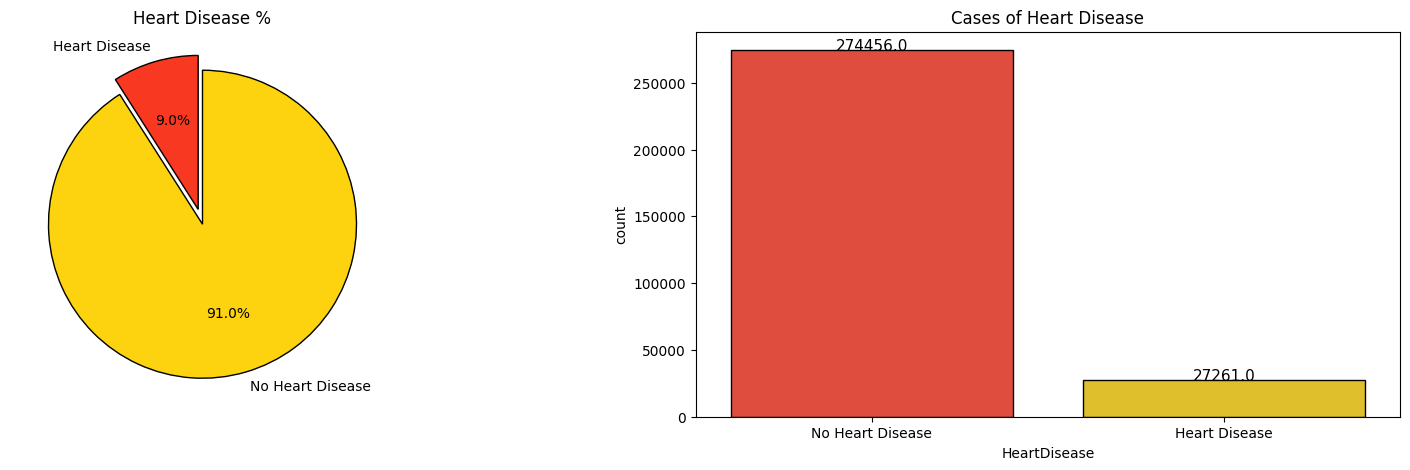

In [16]:
colors = ['#F93822','#FDD20E']
l = list(df1['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Heart Disease','No Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'HeartDisease',data = df1,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

<Axes: >

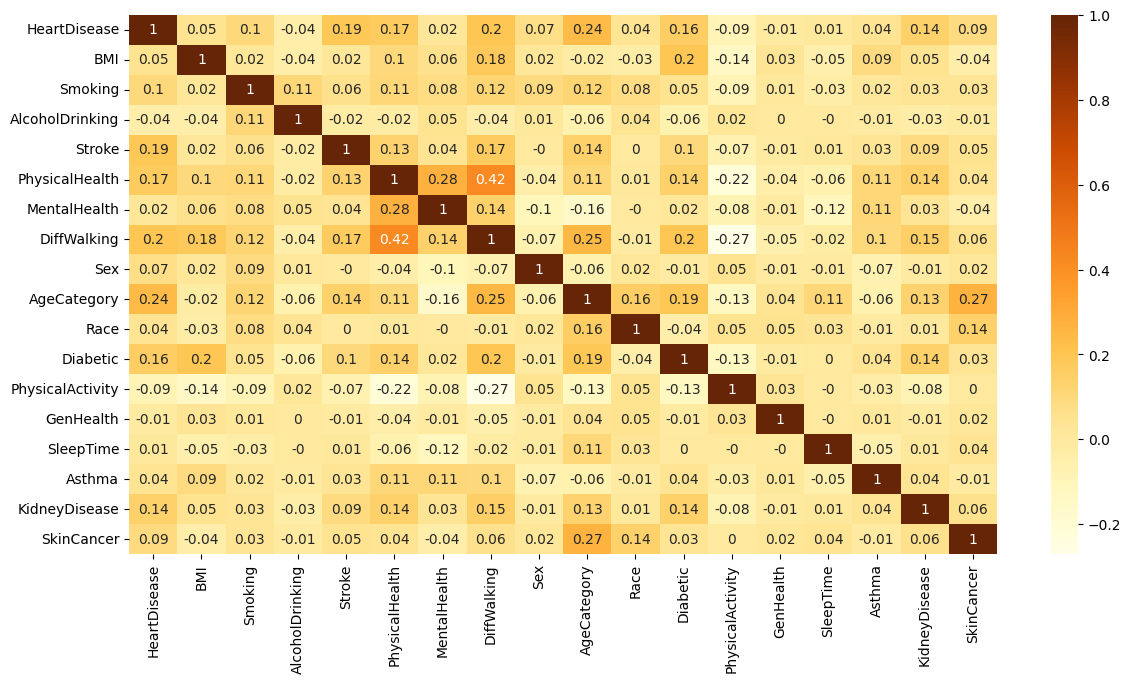

In [17]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')


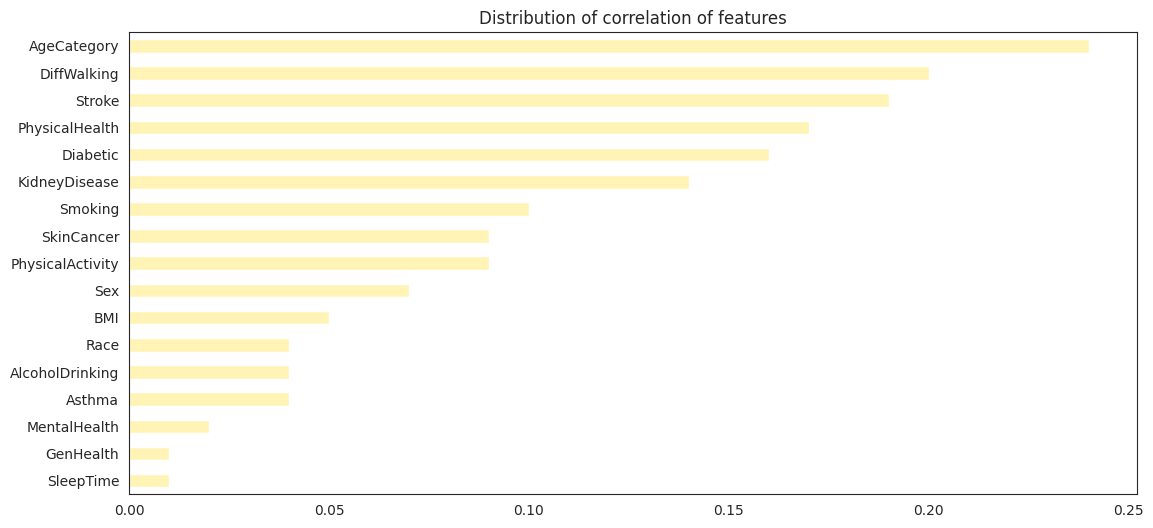

In [18]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

# **Models Training and Testing without Applaying data balancing techniques**

In [19]:
x=df1.drop('HeartDisease',axis=1)
y=df1['HeartDisease']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [22]:
print(X_train_scaled)

[[-0.97190996 -0.85228337 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]
 [-0.28657906  1.17331868 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]
 [-0.04887421 -0.85228337 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]
 ...
 [-0.2881226  -0.85228337 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]
 [ 0.44505797 -0.85228337 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]
 [-0.15383479 -0.85228337 -0.27629152 ... -0.40605488 -0.20160625
  -0.32809043]]


# **Random Forest**

In [23]:
rf_classifier = RandomForestClassifier(random_state=42)

In [24]:
# rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.74%
Test Accuracy: 89.91%


Confusion Matrix:


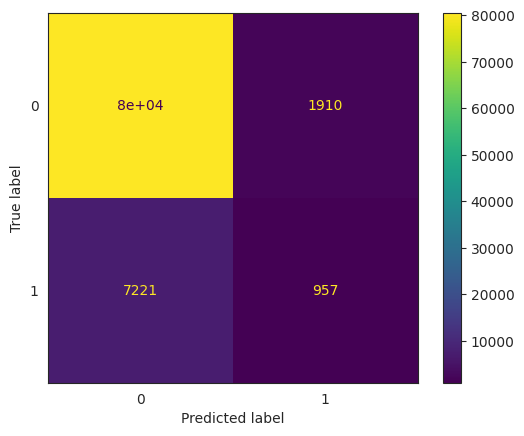

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     82338
           1       0.33      0.12      0.17      8178

    accuracy                           0.90     90516
   macro avg       0.63      0.55      0.56     90516
weighted avg       0.86      0.90      0.88     90516



In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)

# Plot the confusion matrix
cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

We will apply different techniques to balance our data
1- Random Over Sampling
2-Random Under sampling
3- SMOTE

# **XGBoost**

In [31]:
from xgboost import XGBClassifier

# fit model no training data
xgb_classifier_start = XGBClassifier(learning_rate =0.9,n_estimators=1000)
xgb_classifier_start.fit(X_train_scaled, y_train)

y_pred_over_start = xgb_classifier_start.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
trover_accuracystart = xgb_classifier_start.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
tsover_accuracystart = accuracy_score(y_test, y_pred_over_start)

print("Train Accuracy:", f'{round(trover_accuracystart, 4) * 100}%')
print("Test Accuracy:", f'{round(tsover_accuracystart, 4) * 100}%')

Train Accuracy: 97.3%
Test Accuracy: 89.33%


Confusion Matrix:


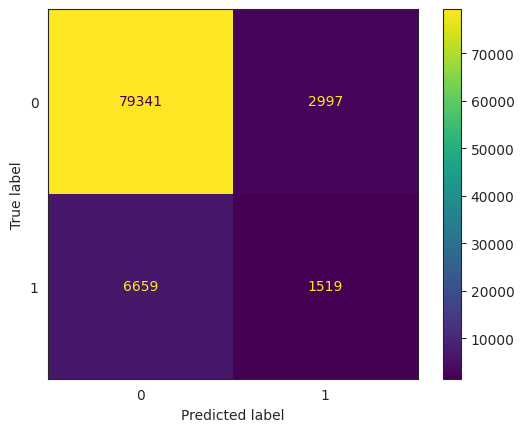

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     82338
           1       0.34      0.19      0.24      8178

    accuracy                           0.89     90516
   macro avg       0.63      0.57      0.59     90516
weighted avg       0.87      0.89      0.88     90516



In [32]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score,classification_report
c_matrix = confusion_matrix(y_test, y_pred_over_start)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred_over_start))

# **Models Performance Using Data Balancing Techniques**

# Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_overR, y_overR = ros.fit_resample(X_train_scaled, y_train)

In [34]:
y_train.value_counts()

0    192118
1     19083
Name: HeartDisease, dtype: int64

In [35]:
y_overR.value_counts()

0    192118
1    192118
Name: HeartDisease, dtype: int64

In [36]:
x_train.shape

(211201, 17)

In [37]:
x_overR.shape

(384236, 17)

In [38]:
x_overtrain, x_overtest, y_overtrain, y_overtest = train_test_split(x_overR, y_overR, stratify=y_overR, test_size=0.3, random_state=42)

In [39]:
print(x_overtrain.shape)
print(x_overtest.shape)
print(y_overtrain.shape)
print(y_overtest.shape)

(268965, 17)
(115271, 17)
(268965,)
(115271,)


In [40]:
# print(x_overtrain.value_counts)
# print(x_overtest.value_counts)
# y_overtrain.value_counts()
y_overtest.value_counts()

0    57636
1    57635
Name: HeartDisease, dtype: int64

In [41]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_overtrain, y_overtrain)

# Make predictions on the test data
y_pred_over = rf_classifier.predict(x_overtest)

# Calculate the train accuracy of the classifier
trover_accuracy = rf_classifier.score(x_overtrain, y_overtrain)

# Calculate the accuracy of the classifier
tsover_accuracy = accuracy_score(y_overtest, y_pred_over)

print("Train Accuracy:", f'{round(trover_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(tsover_accuracy, 4) * 100}%')

Train Accuracy: 99.86%
Test Accuracy: 96.38%


Confusion Matrix:


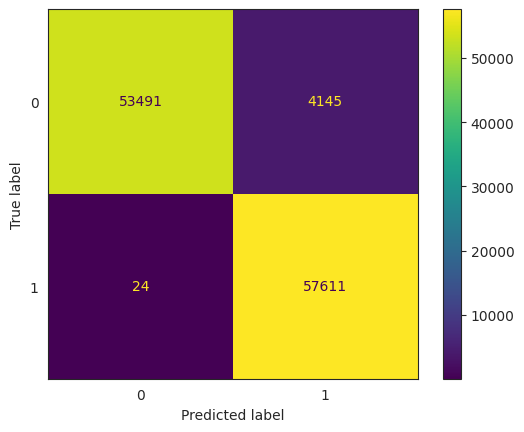

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     57636
           1       0.93      1.00      0.97     57635

    accuracy                           0.96    115271
   macro avg       0.97      0.96      0.96    115271
weighted avg       0.97      0.96      0.96    115271



In [42]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score,classification_report
c_matrix = confusion_matrix(y_overtest, y_pred_over)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_overtest, y_pred_over))

In [43]:
from xgboost import XGBClassifier

# fit model no training data
xgb_classifier = XGBClassifier(learning_rate =0.9,n_estimators=1000)
xgb_classifier.fit(x_overtrain, y_overtrain)

y_pred_over1 = xgb_classifier.predict(x_overtest)

# Calculate the train accuracy of the classifier
trover_accuracy1 = xgb_classifier.score(x_overtrain, y_overtrain)

# Calculate the accuracy of the classifier
tsover_accuracy1 = accuracy_score(y_overtest, y_pred_over1)

print("Train Accuracy:", f'{round(trover_accuracy1, 4) * 100}%')
print("Test Accuracy:", f'{round(tsover_accuracy1, 4) * 100}%')

Train Accuracy: 96.88%
Test Accuracy: 92.44%


Confusion Matrix:


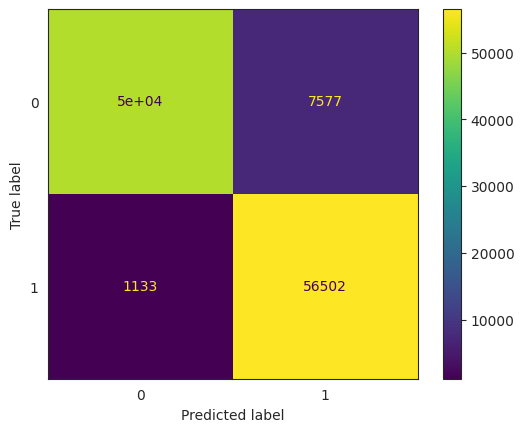

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     57636
           1       0.88      0.98      0.93     57635

    accuracy                           0.92    115271
   macro avg       0.93      0.92      0.92    115271
weighted avg       0.93      0.92      0.92    115271



In [44]:
c_matrix = confusion_matrix(y_overtest, y_pred_over1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_overtest, y_pred_over1))

# Under Sampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_underR, y_underR = rus.fit_resample(X_train_scaled, y_train)

In [46]:
x_undertrain, x_undertest, y_undertrain, y_undertest = train_test_split(x_underR, y_underR, stratify=y_underR, test_size=0.3, random_state=42)

In [47]:
y_underR.value_counts()

0    19083
1    19083
Name: HeartDisease, dtype: int64

In [48]:
 y_undertest.value_counts()

0    5725
1    5725
Name: HeartDisease, dtype: int64

In [49]:
rfud_classifier = RandomForestClassifier(random_state=42)
rfud_classifier.fit(x_undertrain, y_undertrain)

# Make predictions on the test data
y_pred_under = rfud_classifier.predict(x_undertest)

# Calculate the train accuracy of the classifier
trunder_accuracy = rfud_classifier.score(x_undertrain, y_undertrain)

# Calculate the accuracy of the classifier
tsunder_accuracy = accuracy_score(y_undertest, y_pred_under)

print("Train Accuracy:", f'{round(trunder_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(tsunder_accuracy, 4) * 100}%')

Train Accuracy: 99.92%
Test Accuracy: 74.48%


Confusion Matrix:


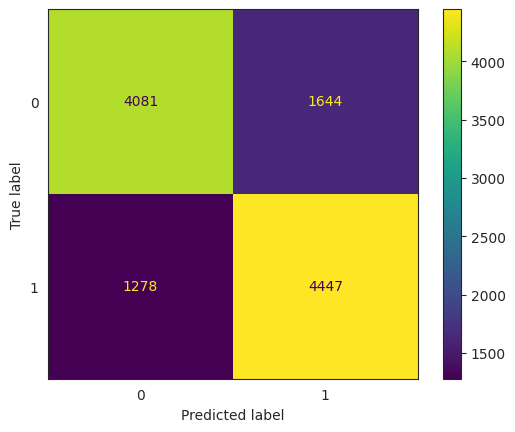

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      5725
           1       0.73      0.78      0.75      5725

    accuracy                           0.74     11450
   macro avg       0.75      0.74      0.74     11450
weighted avg       0.75      0.74      0.74     11450



In [50]:
c_matrix = confusion_matrix(y_undertest, y_pred_under)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_undertest, y_pred_under))

In [51]:
from xgboost import XGBClassifier

# fit model no training data
xgb_classifier2 = XGBClassifier(learning_rate =0.9,n_estimators=1000)
xgb_classifier2.fit(x_undertrain, y_undertrain)

y_pred_over2 = xgb_classifier2.predict(x_undertest)

# Calculate the train accuracy of the classifier
trunder_accuracy1 = xgb_classifier2.score(x_undertrain, y_undertrain)

# Calculate the accuracy of the classifier
tsunder_accuracy1 = accuracy_score(y_undertest, y_pred_over2)

print("Train Accuracy:", f'{round(trunder_accuracy1, 4) * 100}%')
print("Test Accuracy:", f'{round(tsunder_accuracy1, 4) * 100}%')

Train Accuracy: 99.81%
Test Accuracy: 71.03%


Confusion Matrix:


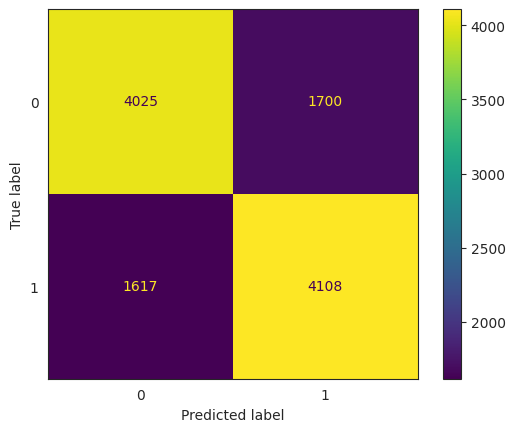

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      5725
           1       0.71      0.72      0.71      5725

    accuracy                           0.71     11450
   macro avg       0.71      0.71      0.71     11450
weighted avg       0.71      0.71      0.71     11450



In [52]:
c_matrix = confusion_matrix(y_undertest, y_pred_over2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_undertest, y_pred_over2))

# SMOTE

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(X_train_scaled, y_train)

In [54]:
x_smotetrain, x_smotetest, y_smotetrain, y_smotetest = train_test_split(x_smote, y_smote, stratify=y_smote, test_size=0.3, random_state=42)

In [55]:
y_smotetrain.value_counts()

1    134483
0    134482
Name: HeartDisease, dtype: int64

In [56]:
rfsmote_classifier = RandomForestClassifier(random_state=42)
rfsmote_classifier.fit(x_smotetrain, y_smotetrain)

# Make predictions on the test data
y_pred_smote = rfud_classifier.predict(x_smotetest)

# Calculate the train accuracy of the classifier
trsmote_accuracy = rfsmote_classifier.score(x_smotetrain, y_smotetrain)

# Calculate the accuracy of the classifier
tssmote_accuracy = accuracy_score(y_smotetest, y_pred_smote)

print("Train Accuracy:", f'{round(trsmote_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(tssmote_accuracy, 4) * 100}%')

Train Accuracy: 99.9%
Test Accuracy: 80.12%


In [57]:
xgb_classifier3 = XGBClassifier(learning_rate =0.9,n_estimators=1000)
xgb_classifier3.fit(x_smotetrain, y_smotetrain)

y_pred_over3 = xgb_classifier3.predict(x_smotetest)

# Calculate the train accuracy of the classifier
trover_accuracy3 = xgb_classifier3.score(x_smotetrain, y_smotetrain)

# Calculate the accuracy of the classifier
tsover_accuracy3 = accuracy_score(y_smotetest, y_pred_over3)

print("Train Accuracy:", f'{round(trover_accuracy3, 4) * 100}%')
print("Test Accuracy:", f'{round(tsover_accuracy3, 4) * 100}%')

Train Accuracy: 98.63%
Test Accuracy: 93.35%


# **Comparison**

In [58]:
from tabulate import tabulate
data = [
    ["Models", "Imabalance", "Over Sampling", "Under Sampling","SMOTE"],
    ["Random Forest (Training)",tr_accuracy,trover_accuracy, trunder_accuracy, trsmote_accuracy],
    ["Random Forest (Testing)",ts_accuracy,tsover_accuracy, tsunder_accuracy, tssmote_accuracy],
    ["XGBoost (Training)",trover_accuracystart,trover_accuracy1,trunder_accuracy1,trover_accuracy3],
    ["XGBoost (Testing)",tsover_accuracystart,tsover_accuracy1,tsunder_accuracy1,tsover_accuracy3],
]

table = tabulate(data, headers="firstrow", tablefmt="grid")
print(table)

+--------------------------+--------------+-----------------+------------------+----------+
| Models                   |   Imabalance |   Over Sampling |   Under Sampling |    SMOTE |
+==========================+==============+=================+==================+==========+
| Random Forest (Training) |     0.997358 |        0.998569 |         0.999177 | 0.998985 |
+--------------------------+--------------+-----------------+------------------+----------+
| Random Forest (Testing)  |     0.899123 |        0.963833 |         0.744803 | 0.801164 |
+--------------------------+--------------+-----------------+------------------+----------+
| XGBoost (Training)       |     0.973049 |        0.968844 |         0.998128 | 0.986288 |
+--------------------------+--------------+-----------------+------------------+----------+
| XGBoost (Testing)        |     0.893323 |        0.924439 |         0.710306 | 0.933496 |
+--------------------------+--------------+-----------------+------------------+